In [1]:
from tvDatafeed import TvDatafeed, Interval
import mplfinance as mpf
from datetime import datetime
import pandas as pd
import math
import schedule
import time
from IPython.display import display, clear_output

In [2]:
tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [3]:
dax = tv.get_hist(symbol='DE30EUR',exchange='OANDA',interval=Interval.in_1_minute,n_bars=6)
# dax.reset_index(level=0, inplace=True)
dax = dax[:-1]
dax

,symbol,open,high,low,close,volume
datetime,,,,,,
2022-03-04 16:03:00,OANDA:DE30EUR,13089.2,13089.20,13078.6,13085.2,189.0
2022-03-04 16:04:00,OANDA:DE30EUR,13085.2,13089.65,13084.2,13086.6,198.0
2022-03-04 16:05:00,OANDA:DE30EUR,13086.6,13093.65,13085.6,13089.2,188.0
2022-03-04 16:06:00,OANDA:DE30EUR,13089.2,13092.60,13084.2,13091.2,173.0
2022-03-04 16:07:00,OANDA:DE30EUR,13091.2,13091.65,13082.6,13082.6,155.0


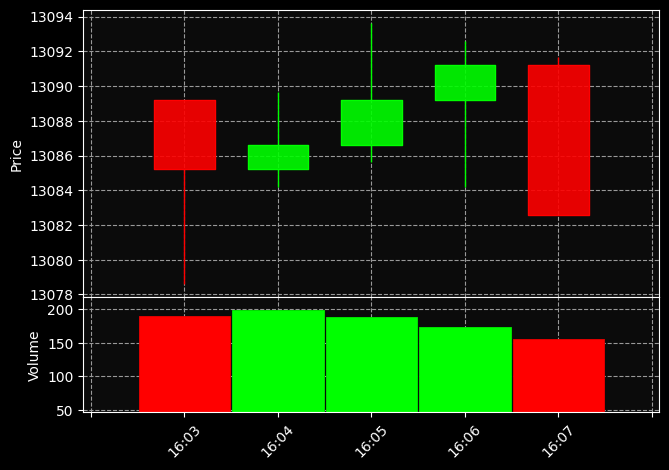

In [4]:
colors = mpf.make_marketcolors(up="#00ff00", down="#ff0000", wick="inherit", edge="inherit", volume="in")
mpf_style = mpf.make_mpf_style(base_mpf_style='nightclouds', marketcolors=colors)

mpf.plot(dax, type="candle", volume=True, style=mpf_style, closefig=True)

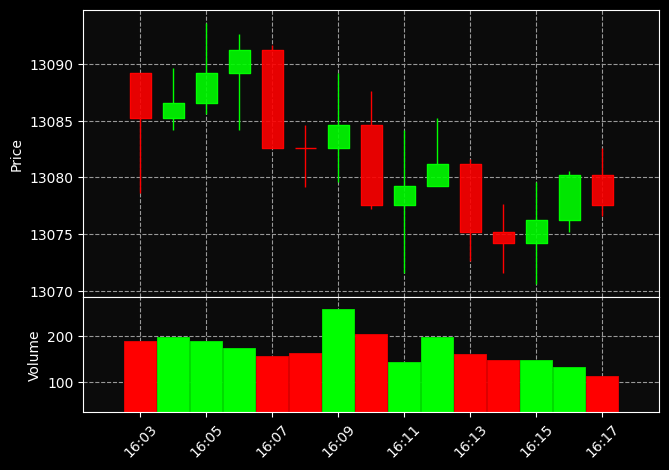

In [ ]:
def func():
    global dax
    last_bar = dax.index[-1]
    now = datetime.now()
    diff = now - last_bar
    update_bar = (math.floor(diff.total_seconds()/60))
    
    temp = tv.get_hist(symbol='DE30EUR',exchange='OANDA',interval=Interval.in_1_minute,n_bars=update_bar+1)
    temp = temp[:-1]  
    
    dax = dax.append(temp)
    dax = dax.drop_duplicates()
    
    clear_output(wait = True)
    mpf.plot(dax, type="candle", volume=True, style=mpf_style)    
    
schedule.every(10).seconds.do(func)

while True:
    schedule.run_pending()
    time.sleep(1)

In [ ]:
dax